**INTRODUCTION**

This project is about classifying various subspecies of honey bees using the annotated honey bee images which is capture from various location in US using the machine learning  approach called Deep Learning. This is the classification problem the objective of this approach is to increase the accuracy of classification of honey bee sub species calssification by training a model using the above mentioned dataset so that we can be able to predict the subspecies of honey bees with the help of its image. There are two main steps involved in this process as follows,

            - 1. Exploratory Data Analysis and preprocessing.
            - 2. Build a Model.
            - 3. Train a Model.
            - 4. Model Evaluation.
            - 5. Model Refinement.
            - 6. Optimzed Model Evaluation.

**1.EXPLORATORY DATA ANALYSIS AND PREPROCESSING**

In this step we are going to analyze the dataset and understand the relationship between various features of dataset. we are going to preprocess the dataset so that it can be well structured to build a machine learning model and used to calssify the subspecies. There are several steps involved in this process which we are going to explore with the respective code.

***Load the data and packages***

Inorder to explore data we need to first load the data's into the dataframe again inorder to load the data's we need to import packages based on the data manipulation, so the below two code calls depicts the importing of required packages , listing the input directory and loading dataset into the pandas dataframe and displaying it. 

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import skimage.io
 
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['bee_imgs', 'bee_data.csv']


In [2]:
bee_data_pd = pd.read_csv('../input/bee_data.csv')
print(bee_data_pd.shape)
bee_data_pd.sample(100).head()

(5172, 9)


,file,date,time,location,zip code,subspecies,health,pollen_carrying,caste
194,017_025.png,8/6/18,13:21,"Saratoga, CA, USA",95070,Italian honey bee,healthy,False,worker
597,008_131.png,8/16/18,8:20,"New Orleans, LA, USA",70115,VSH Italian honey bee,healthy,False,worker
4575,038_341.png,8/18/18,12:30,"Athens, Georgia, USA",30607,1 Mixed local stock 2,"Varroa, Small Hive Beetles",False,worker
4331,038_471.png,8/18/18,12:30,"Athens, Georgia, USA",30607,1 Mixed local stock 2,"Varroa, Small Hive Beetles",False,worker
4354,038_138.png,8/18/18,12:30,"Athens, Georgia, USA",30607,1 Mixed local stock 2,"Varroa, Small Hive Beetles",False,worker


The above results shows that there are 5172 rows(dataset) with 9 feature each.

The data contains the following values:

- file - the image file name;
- date - the date when the picture was taken;
- time - the time when the picture was taken;
- location - the US location, with city, state and country names;
- zip code - the ZIP code associated with the location;
- subspecies - the subspecies to whom the bee in the current image belongs;
- health - this is the health state of the bee in the current image;
- pollen_carrying - indicates if the picture shows the bee with pollen attached to the legs;
- caste - the bee caste;

***Expore Images associated with csv***

In this section we are going to explore the how each image associated with the data in the csv file and its count using the python implementation. The next two code cells depicts manipulation of image count and how it is associated with the dataset.

In [3]:
image_path = '../input/bee_imgs/bee_imgs/'
image_files = list(os.listdir(image_path))
print("Image count: {}".format(len(image_files)))

Image count: 5172


The above result shows that there are total of 5172 images with respect to each data.so we are going to associate each image with respect to it's respective dataset in the next code cell.

In [4]:
#Function to read images and return its shape.
def read_image_sizes(filename):
    image = skimage.io.imread(image_path+filename)
    return list(image.shape)

#Read images and associates its shape with the data in csv using its file name
size_list = np.stack(bee_data_pd['file'].apply(read_image_sizes))
size_list_df = pd.DataFrame(size_list,columns = ['width','height','c'])
bee_data_pd_updated = pd.concat([bee_data_pd,size_list_df],axis = 1, sort = False)
bee_data_pd_updated.sample(100).head()

,file,date,time,location,zip code,subspecies,health,pollen_carrying,caste,width,height,c
665,008_156.png,8/16/18,8:20,"New Orleans, LA, USA",70115,VSH Italian honey bee,healthy,False,worker,255,167,3
2158,046_023.png,8/19/18,15:46,"Des Moines, IA, USA",50315,Carniolan honey bee,healthy,False,worker,50,42,3
2976,010_855.png,8/19/18,12:46,"Des Moines, IA, USA",50315,Carniolan honey bee,healthy,False,worker,54,45,3
3262,015_1108.png,8/6/18,13:19,"Saratoga, CA, USA",95070,Italian honey bee,healthy,False,worker,60,72,3
3301,015_1247.png,8/6/18,13:19,"Saratoga, CA, USA",95070,Italian honey bee,healthy,False,worker,70,53,3


The above results shows the new updated dataframe(bee_data_pd_updated) which also has height,width and channels of each images associated with the data's fro csv using its file name.

***Plot relationship between various feature***

For the next few section we are going to see the relationship between various features of images associated with the dataset and analyzing it's features inorder to build the optimized model.

Let us first explore the height and width of each image which is require to preprocess the dataset before building a model.

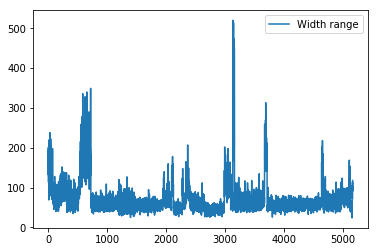

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(bee_data_pd_updated['width'],label = 'Width range')
plt.legend()
_ = plt.ylim()

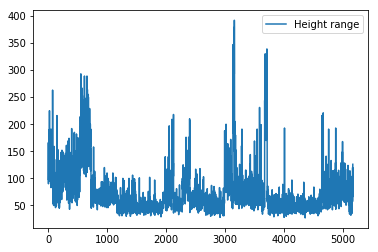

In [6]:
plt.plot(bee_data_pd_updated['height'],label = 'Height range')
plt.legend()
_ = plt.ylim()

The above plots shows that all the images are in various widths and heights so we have to scale it before building a model because we need to give a same sized images as input to the model.

Let us now explore the various location where images captured and how much images has been captured in each location.

In [7]:
zip_code_series = bee_data_pd_updated.groupby(['zip code'])['location'].value_counts()
zip_code_df = pd.DataFrame(data = {'Image_Count': zip_code_series.values},index=zip_code_series.index).reset_index()
zip_code_df

,zip code,location,Image_Count
0,3431,"Keene, NH, USA",92
1,30607,"Athens, GA, USA",579
2,30607,"Athens, Georgia, USA",472
3,50315,"Des Moines, IA, USA",973
4,70115,"New Orleans, LA, USA",170
5,77511,"Alvin, TX, USA",737
6,95070,"Saratoga, CA, USA",2000
7,95124,"San Jose, CA, USA",149


The above results shows that there are 8 locations in which maximum Image has been captured in "Saratoga,CA,USA" .we can also note an imporatant thing from the above results is that there is a same zip code for Athens, GA, USA and Athens, Georgia, USA so from this we can understood that this two locations are same with different names so we can merge the results from this location in the next section in pandas dataframe.

In [8]:
bee_data_pd_updated=bee_data_pd_updated.replace({'location':'Athens, Georgia, USA'}, 'Athens, GA, USA')
zip_code_series = bee_data_pd_updated.groupby(['zip code'])['location'].value_counts()
zip_code_df = pd.DataFrame(data = {'Image_Count': zip_code_series.values},index=zip_code_series.index).reset_index()
zip_code_df

,zip code,location,Image_Count
0,3431,"Keene, NH, USA",92
1,30607,"Athens, GA, USA",1051
2,50315,"Des Moines, IA, USA",973
3,70115,"New Orleans, LA, USA",170
4,77511,"Alvin, TX, USA",737
5,95070,"Saratoga, CA, USA",2000
6,95124,"San Jose, CA, USA",149


 Now we have 7 location where each image has been captured. The below code and plot shows the realtion ship between image count and its respective location for simplicity. From this we can easily have a sight from where the largest pics were taken and viceversa.

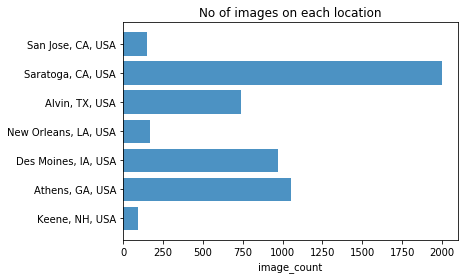

In [9]:
y_pos = np.arange(len(zip_code_df['location']))
x_pos = zip_code_df['Image_Count']
plt.barh(y_pos,x_pos,align='center', alpha=0.8)
plt.yticks(y_pos, zip_code_df['location'])
plt.xlabel('image_count')
plt.title('No of images on each location')
 
plt.show()

Now we are going to separate date,time and year from datatime in the csv records and cancatenate into data frame as a separate feature  which can be used for preprocessing and exploration purporse. The code pelow performs this task.

In [10]:
bee_data_pd_updated['date_time'] = pd.to_datetime(bee_data_pd_updated['date'] + ' ' + bee_data_pd_updated['time'])
bee_data_pd_updated["year"] = bee_data_pd_updated['date_time'].dt.year
bee_data_pd_updated["month"] = bee_data_pd_updated['date_time'].dt.month
bee_data_pd_updated["day"] = bee_data_pd_updated['date_time'].dt.day
bee_data_pd_updated["hour"] = bee_data_pd_updated['date_time'].dt.hour
bee_data_pd_updated["minute"] = bee_data_pd_updated['date_time'].dt.minute
bee_data_pd_updated

,file,date,time,location,zip code,subspecies,health,pollen_carrying,caste,width,height,c,date_time,year,month,day,hour,minute
0,041_066.png,8/28/18,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker,115,164,3,2018-08-28 16:07:00,2018,8,28,16,7
1,041_072.png,8/28/18,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker,201,90,3,2018-08-28 16:07:00,2018,8,28,16,7
2,041_073.png,8/28/18,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker,132,167,3,2018-08-28 16:07:00,2018,8,28,16,7
3,041_067.png,8/28/18,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker,134,97,3,2018-08-28 16:07:00,2018,8,28,16,7
4,041_059.png,8/28/18,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker,147,106,3,2018-08-28 16:07:00,2018,8,28,16,7
5,041_071.png,8/28/18,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker,194,135,3,2018-08-28 16:07:00,2018,8,28,16,7
6,041_065.png,8/28/18,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker,159,170,3,2018-08-28 16:07:00,2018,8,28,16,7
7,041_064.png,8/28/18,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker,132,95,3,2018-08-28 16:07:00,2018,8,28,16,7
8,041_070.png,8/28/18,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker,126,190,3,2018-08-28 16:07:00,2018,8,28,16,7
9,041_058.png,8/28/18,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker,156,189,3,2018-08-28 16:07:00,2018,8,28,16,7


Let us now see a relationship between subspecies and images i.e number of images belongs to a particular subspecies.

In [11]:
sub_species_series = bee_data_pd_updated.groupby(['subspecies'])['year'].value_counts()
sub_species_df = pd.DataFrame(data = {'Image_Count': sub_species_series.values},index=sub_species_series.index).reset_index()
sub_species_df

,subspecies,year,Image_Count
0,-1,2018,428
1,1 Mixed local stock 2,2018,472
2,Carniolan honey bee,2018,501
3,Italian honey bee,2018,3008
4,Russian honey bee,2018,527
5,VSH Italian honey bee,2018,199
6,Western honey bee,2018,37


The above results shows the distribution of each images with respect to it subspecies.The plot for the same distribution has shown below.

Note: All images were taken in the same year that's why i have used year to fetch the results.

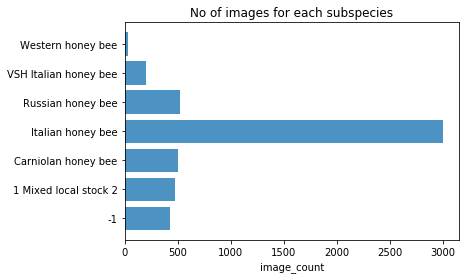

In [12]:
y_pos = np.arange(len(sub_species_df['subspecies']))
x_pos = sub_species_df['Image_Count']
plt.barh(y_pos,x_pos,align='center', alpha=0.8)
plt.yticks(y_pos, sub_species_df['subspecies'])
plt.xlabel('image_count')
plt.title('No of images for each subspecies')
 
plt.show()

Let us now see a relationship between health and images i.e number of honey bees belongs to a particular health status.

In [13]:
health_series = bee_data_pd_updated.groupby(['health'])['year'].value_counts()
health_df = pd.DataFrame(data = {'Image_Count': health_series.values},index=health_series.index).reset_index()
health_df

,health,year,Image_Count
0,"Varroa, Small Hive Beetles",2018,472
1,ant problems,2018,457
2,"few varrao, hive beetles",2018,579
3,healthy,2018,3384
4,hive being robbed,2018,251
5,missing queen,2018,29


The above results shows the distribution of each honey bee with respect to its health.The plot for the same distribution has shown below.

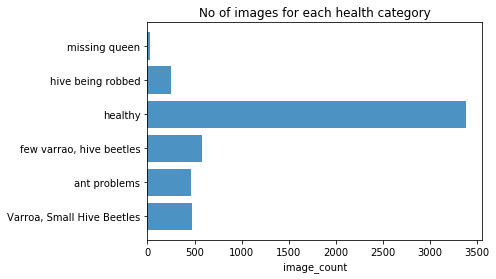

In [14]:
y_pos = np.arange(len(health_df['health']))
x_pos = health_df['Image_Count']
plt.barh(y_pos,x_pos,align='center', alpha=0.8)
plt.yticks(y_pos, health_df['health'])
plt.xlabel('image_count')
plt.title('No of images for each health category')
 
plt.show()

Now we will combine health,location and subspecies and explore deeply. 

In [15]:
hls_series = bee_data_pd_updated.groupby(['health','location'])['subspecies'].value_counts()
hls_df = pd.DataFrame(data = {'Image_Count': hls_series.values},index=hls_series.index).reset_index()
hls_df

,health,location,subspecies,Image_Count
0,"Varroa, Small Hive Beetles","Athens, GA, USA",1 Mixed local stock 2,472
1,ant problems,"Alvin, TX, USA",Italian honey bee,457
2,"few varrao, hive beetles","Athens, GA, USA",Italian honey bee,579
3,healthy,"Des Moines, IA, USA",Carniolan honey bee,501
4,healthy,"Des Moines, IA, USA",Russian honey bee,435
5,healthy,"Des Moines, IA, USA",Western honey bee,37
6,healthy,"Keene, NH, USA",Russian honey bee,92
7,healthy,"New Orleans, LA, USA",VSH Italian honey bee,170
8,healthy,"San Jose, CA, USA",-1,149
9,healthy,"Saratoga, CA, USA",Italian honey bee,1972


The above results shows the statistics of number of  healthy sunspecies found in each location for each species.

Now let us investigate on pollen_carrying feature which depicts the distribution of number of pollen carrying bees and viceversa.

In [16]:
pollen_series = bee_data_pd_updated.groupby(['pollen_carrying'])['year'].value_counts()
pollen_df = pd.DataFrame(data = {'Image_Count': pollen_series.values},index=pollen_series.index).reset_index()
pollen_df

,pollen_carrying,year,Image_Count
0,False,2018,5154
1,True,2018,18


If you see the above results it is clear that only 18 bees out of 5172 are carrying pollen others were not. so we will not try to predict this, as the data is highly unbalanced.

In [17]:
pollen_series = bee_data_pd_updated.groupby(['pollen_carrying'])['subspecies'].value_counts()
pollen_df = pd.DataFrame(data = {'Image_Count': pollen_series.values},index=pollen_series.index).reset_index()
pollen_df[pollen_df['pollen_carrying']==True]

,pollen_carrying,subspecies,Image_Count
7,True,-1,12
8,True,Italian honey bee,6


If you see the above results only 6 italian honey bees are pollen carrying and others are not (-1 represents unknown species.

There is only one case all bees are worker bee so there is no problem with the caste.

In [18]:
bee_data_pd_updated.groupby(['caste'])['caste'].nunique()

caste
worker    1
Name: caste, dtype: int64

The below code is used to plot some sample images from the dataset.

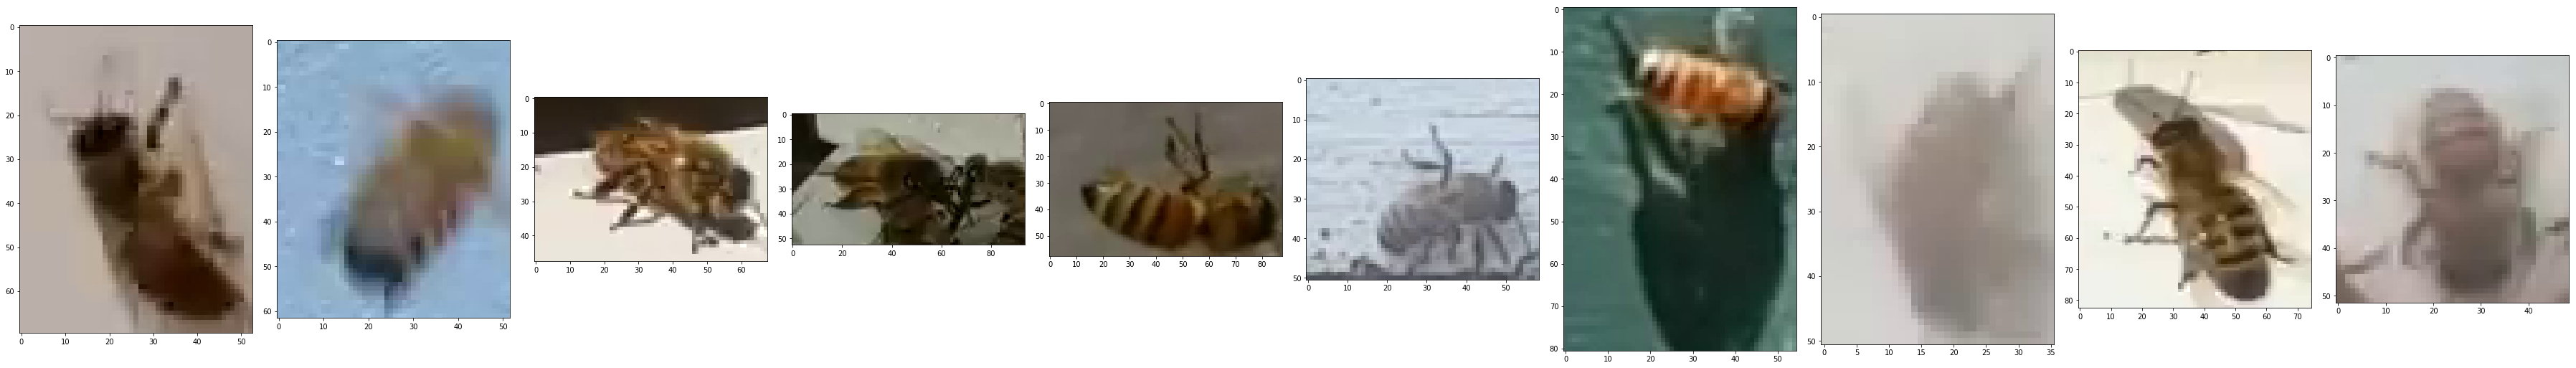

In [19]:
import imageio
f, ax = plt.subplots(nrows=1,ncols=10, figsize=(50,50))
sample = bee_data_pd_updated.sample(10)
for j in range(0,10):
    file=image_path + sample.iloc[j]['file']
    im=imageio.imread(file)
    ax[j].imshow(im, resample=True)
plt.tight_layout()
plt.show()
   

**2.Build a Model**

In the next few section we are going to build a CNN model which will be used to train on the above dataset and tuning it to an otimized model based on the accuracy,precision,recall,f1-score and loss.

***Split the dataset***

Let us first split the dataset to training,test and validation set this will reduce the imapact of overfittiong by not exploring some of the datas during training which can only be tested once the model is successfully learned to classify the subspecies.

In [20]:
from sklearn.model_selection import train_test_split
train_data,test_data = train_test_split(bee_data_pd_updated,test_size = 0.2,random_state = 40)
train_data,val_data = train_test_split(train_data,test_size = 0.2,random_state = 40)
print("Train set size: {}".format(train_data.shape[0]))
print("Test  set size: {}".format(test_data.shape[0]))
print("Val   set size: {}".format(val_data.shape[0]))

Train set size: 3309
Test  set size: 1035
Val   set size: 828


The above code is implemented by using the sklearn library which has train_test_split  method which is used to split 20% of dataset as test_set , 20% as validation set and the remaining 60% is used for training a model.we will use random_state to ensure the reproduceablity of results.

Let us now create a function which scales each image to a fixed size and returns a shape of fixed size of each image.The shape will be (100,100,3) which is height,width and channels respectively.

In [21]:
import skimage.transform
def readImgAndScale(file_name):
    image = skimage.io.imread(image_path + file_name)
    image = skimage.transform.resize(image, (100, 100), mode='reflect')
    return image[:,:,:3]

Let us now create a function which takes a dataset as input and returns a categorically encoded results i.e the image and the respective subspecies as X and y respectively inorder to train the model.

In [22]:
def categoricalEncoding(dataset, var='subspecies'):
    X = np.stack(dataset['file'].apply(readImgAndScale))
    y = pd.get_dummies(dataset[var], drop_first=False)
    return X, y

Now let us populate training,testing and validation variables by encoding the respecive training,testing an validation datase respectively.

In [23]:
X_train,y_train = categoricalEncoding(train_data)
X_val,y_val = categoricalEncoding(val_data)
X_test,y_test = categoricalEncoding(test_data)

**BaseLine Model**

Then, we will begin to create a simple benchmark CNN model inorder to classify the subspecies.The details of model architecture is as follows,

-  Created a sequential model
-  Added a convolutional layer with 16 filters of dimension 3 and relu function.
-  Added a maxpool layer in order to reduce the complexity of size of each layer
-  Added a 2nd convolution layer and dropout layer with the same configuration as before.
- Added a flatten and dense output layer with the same number of nodes as of number of categorical variable.
- Compiled with Adam optimizer , added a categorical_crossentropy loss function and accuracy metric for adjusting weights during back propagation.
- The image generator is added inorder to depict a data augmentation to improve accuracy.

In [24]:
from sklearn import metrics
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D, Dropout
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping, LearningRateScheduler

model1 = Sequential()
model1.add(Conv2D(16,kernel_size = 3,input_shape = (100,100,3),activation = 'relu',padding = 'same'))
model1.add(MaxPool2D(2))
model1.add(Conv2D(16, kernel_size=3, activation='relu', padding='same'))
model1.add(Flatten())
model1.add(Dense(y_train.columns.size, activation='softmax'))
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
image_generator = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False,
        rotation_range=180,
        zoom_range = 0.1, 
        width_shift_range=0.1,
        height_shift_range=0.1, 
        horizontal_flip=True,
        vertical_flip=True)
image_generator.fit(X_train)
model1.summary()

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 100, 100, 16)      448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 16)        2320      
_________________________________________________________________
flatten_1 (Flatten)          (None, 40000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 280007    
Total params: 282,775
Trainable params: 282,775
Non-trainable params: 0
_________________________________________________________________


**3.Train a Model**

In [25]:
train_model_details_old  = model1.fit_generator(image_generator.flow(X_train, y_train, batch_size=32),
                        epochs=5,
                        validation_data=[X_val, y_val],
                        steps_per_epoch=len(X_train)/32,
                       )

Epoch 1/5
104/103 [==============================] - 12s 116ms/step - loss: 0.9933 - acc: 0.6713 - val_loss: 0.6835 - val_acc: 0.7186
Epoch 2/5
104/103 [==============================] - 9s 88ms/step - loss: 0.5273 - acc: 0.7964 - val_loss: 0.5077 - val_acc: 0.7935
Epoch 3/5
104/103 [==============================] - 9s 87ms/step - loss: 0.4399 - acc: 0.8262 - val_loss: 0.4170 - val_acc: 0.8225
Epoch 4/5
104/103 [==============================] - 9s 88ms/step - loss: 0.3702 - acc: 0.8514 - val_loss: 0.3758 - val_acc: 0.8345
Epoch 5/5
104/103 [==============================] - 9s 88ms/step - loss: 0.3714 - acc: 0.8525 - val_loss: 0.3558 - val_acc: 0.8466


**4.Model Evaluation**

Let's start by plotting the loss error for the train and validation set. We define a function to visualize these values.

In [35]:
import seaborn as sns
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

def create_trace(x,y,ylabel,color):
        trace = go.Scatter(
            x = x,y = y,
            name=ylabel,
            marker=dict(color=color),
            mode = "markers+lines",
            text=x
        )
        return trace
    
def plot_accuracy_and_loss(train_model):
    hist = train_model.history
    acc = hist['acc']
    val_acc = hist['val_acc']
    loss = hist['loss']
    val_loss = hist['val_loss']
    epochs = list(range(1,len(acc)+1))
    
    #plt.scatter(epochs, acc)
   # plt.grid(True)

    #plt.show()
    #define the traces
    trace_ta = create_trace(epochs,acc,"Training accuracy", "Green")
    trace_va = create_trace(epochs,val_acc,"Validation accuracy", "Red")
    trace_tl = create_trace(epochs,loss,"Training loss", "Blue")
    trace_vl = create_trace(epochs,val_loss,"Validation loss", "Magenta")
    fig = tools.make_subplots(rows=1,cols=2, subplot_titles=('Training and validation accuracy',
                                                             'Training and validation loss'))
    #add traces to the figure
    fig.append_trace(trace_ta,1,1)
    fig.append_trace(trace_va,1,1)
    fig.append_trace(trace_tl,1,2)
    fig.append_trace(trace_vl,1,2)
    #set the layout for the figure
    fig['layout']['xaxis'].update(title = 'Epoch')
    fig['layout']['xaxis2'].update(title = 'Epoch')
    fig['layout']['yaxis'].update(title = 'Accuracy', range=[0,1])
    fig['layout']['yaxis2'].update(title = 'Loss', range=[0,1])
    #plot
    iplot(fig, filename='accuracy-loss')

plot_accuracy_and_loss(train_model_details_old)

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



Let's continue by evaluating the test set loss and accuracy. We will use here the test set.

In [27]:
score = model1.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.3333283302144728
Test accuracy: 0.851207729468599


Let's check also the test accuracy per class.The function below is used to predict the model accuracy interms of precision,recall and f1-score.

In [28]:
def model_accuracy(model):
    predicted = model.predict(X_test)
    test_predicted = np.argmax(predicted, axis=1)
    test_truth = np.argmax(y_test.values, axis=1)
    print(metrics.classification_report(test_truth, test_predicted, target_names=y_test.columns)) 
    test_res = model.evaluate(X_test, y_test.values, verbose=0)
    print('Loss function: %s, accuracy:' % test_res[0], test_res[1])
model_accuracy(model1)

                       precision    recall  f1-score   support

                   -1       0.92      0.59      0.72        74
1 Mixed local stock 2       0.56      0.47      0.51        93
  Carniolan honey bee       0.98      0.97      0.97        98
    Italian honey bee       0.84      0.95      0.89       621
    Russian honey bee       0.95      0.95      0.95       100
VSH Italian honey bee       1.00      0.23      0.38        43
    Western honey bee       1.00      1.00      1.00         6

            micro avg       0.85      0.85      0.85      1035
            macro avg       0.89      0.74      0.78      1035
         weighted avg       0.85      0.85      0.84      1035

Loss function: 0.3333283302144728, accuracy: 0.851207729468599


**5.Model Refinement**

We used a simple model. We separated 20% of the data for testing. From the training data, 80% is used for actual training and 20% for testing.
The data is unbalanced with respect of the classes of subspecies.
The accuracy of the training set obtained after only 5 epochs was 0.86, with a loss of 0.3.
The accuracy of the validation set remained around 0.89 and the loss increased to 0.27 after 3rd epoch.

Adding additional data will only slightly increase the accuracy of the training set (it is already very good).
To reduce the loss of the validation set (which is a sign of overfitting), we can have three strategies:

add Dropout layers;
introduce strides;
modify the learning rate during the training;
We add two Dropout layers. The role of the Dropout layers is to reduce the overfitting, by dropping, each training epoch, a certain percent of the nodes connections (by rotation). This is equivalent of using less training data and in the same time training the network with various data as well as using parallel alternative networks, thus reducing the likelihood that the network will overfit the train data.

In [29]:
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping, LearningRateScheduler

annealer = LearningRateScheduler(lambda x: 1e-3 * 0.995 ** (x+50))
earlystopper = EarlyStopping(monitor='loss', patience=5, verbose=1)
checkpointer = ModelCheckpoint('best_model.h5',
                                monitor='val_acc',
                                verbose=1,
                                save_best_only=True,
                                save_weights_only=True)
model = Sequential()
model.add(Conv2D(16,kernel_size = 3,input_shape = (100,100,3),activation = 'relu',padding = 'same'))
model.add(MaxPool2D(2))
model.add(Dropout(0.4))
model.add(Conv2D(16, kernel_size=3, activation='relu', padding='same'))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(y_train.columns.size, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
image_generator = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False,
        rotation_range=180,
        zoom_range = 0.1, 
        width_shift_range=0.1,
        height_shift_range=0.1, 
        horizontal_flip=True,
        vertical_flip=True)
image_generator.fit(X_train)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 100, 100, 16)      448       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 50, 50, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 50, 50, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 50, 50, 16)        2320      
_________________________________________________________________
dropout_2 (Dropout)          (None, 50, 50, 16)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 40000)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 7)                 280007    
Total para

The above summary shows the CNN architecture information.

The next step is to train the model with the training set and using fit_generator. There are 50 epochs and the steps in each epochs in constarined by the batch_size.

We add an early stopping condition (monitor the loss error and stops the training if for a number of step
given in the patience parameters the loss is not improving).

We are also saving a model checkpoint after each epoch when accuracy improves; if accuracy degrades, no new model is saved. Thus, Model Checkpoint saves all the time the best model in terms of accuracy.

We adjust as well the learning rate with the training epochs.

In [30]:
train_model_details  = model.fit_generator(image_generator.flow(X_train, y_train, batch_size=32),
                        epochs=50,
                        validation_data=[X_val, y_val],
                        steps_per_epoch=len(X_train)/32,
                        callbacks=[earlystopper, checkpointer, annealer])

Epoch 1/50
104/103 [==============================] - 9s 91ms/step - loss: 1.0588 - acc: 0.6419 - val_loss: 0.8007 - val_acc: 0.7488

Epoch 00001: val_acc improved from -inf to 0.74879, saving model to best_model.h5
Epoch 2/50
104/103 [==============================] - 9s 89ms/step - loss: 0.6353 - acc: 0.7599 - val_loss: 0.7964 - val_acc: 0.7307

Epoch 00002: val_acc did not improve from 0.74879
Epoch 3/50
104/103 [==============================] - 9s 90ms/step - loss: 0.4947 - acc: 0.8127 - val_loss: 0.5068 - val_acc: 0.7899

Epoch 00003: val_acc improved from 0.74879 to 0.78986, saving model to best_model.h5
Epoch 4/50
104/103 [==============================] - 9s 90ms/step - loss: 0.4136 - acc: 0.8358 - val_loss: 0.3796 - val_acc: 0.8213

Epoch 00004: val_acc improved from 0.78986 to 0.82126, saving model to best_model.h5
Epoch 5/50
104/103 [==============================] - 9s 90ms/step - loss: 0.3714 - acc: 0.8514 - val_loss: 0.6275 - val_acc: 0.7754

Epoch 00005: val_acc did not

**6.Optimized Model Evaluation**
The plot for the above accuracy and loss for training and validation set is depicted below.

In [31]:
plot_accuracy_and_loss(train_model_details)

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



From the above plot we can infer that both training and validation accuracies are slowly increasing and both training and validation losses are gradually decreasing so form this curves we can make sure that the model is optimized and not overfit.

Let us now calculate the score for testset.

In [32]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.24663296658635717
Test accuracy: 0.9024154588796091


The function below is used to predict the model accuracy interms of precision,recall and f1-score.

In [33]:
model_accuracy(model)

                       precision    recall  f1-score   support

                   -1       0.92      0.82      0.87        74
1 Mixed local stock 2       0.59      0.89      0.71        93
  Carniolan honey bee       0.87      1.00      0.93        98
    Italian honey bee       0.98      0.89      0.93       621
    Russian honey bee       0.92      0.99      0.95       100
VSH Italian honey bee       0.97      0.84      0.90        43
    Western honey bee       1.00      1.00      1.00         6

            micro avg       0.90      0.90      0.90      1035
            macro avg       0.89      0.92      0.90      1035
         weighted avg       0.92      0.90      0.91      1035

Loss function: 0.24663296658635717, accuracy: 0.9024154588796091


From the above results we can understood that the model classifies all the species resonably well and good.The accuracy is 93% which i considered as a very good score so i believe this would be ideally be an optimized model for this problem.

**CONCLUSION**

The problem of honey bee subspecies classification has been successfully solved and obtained a optimized CNN model with an accuracy of  around 90%.